In [2]:
# This line imports most packages you'll need. You may need to import others (eg random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math
from IPython.display import Audio
import audio_utils

# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

In [3]:
# Pure Tone (A)
std_sr = 22050
tone = librosa.core.tone(440, sr=std_sr, duration=10)
print("Pure A Tone")
Audio(tone, rate=std_sr)


Pure A Tone


In [4]:
# Shifted pure tone (D)
y_shifted = librosa.effects.pitch_shift(tone, std_sr, n_steps=5) # shifted by 5 half steps
print("Shifted Pure A Tone up 5 half steps")
Audio(y_shifted, rate=std_sr)


Shifted Pure A Tone up 5 half steps


In [47]:
# Load test speech file
hbd_raw, sr = librosa.core.load('speech.wav')
print("Generated Happy Birthday Text")
Audio(hbd_raw, rate=sr)


Generated Happy Birthday Text


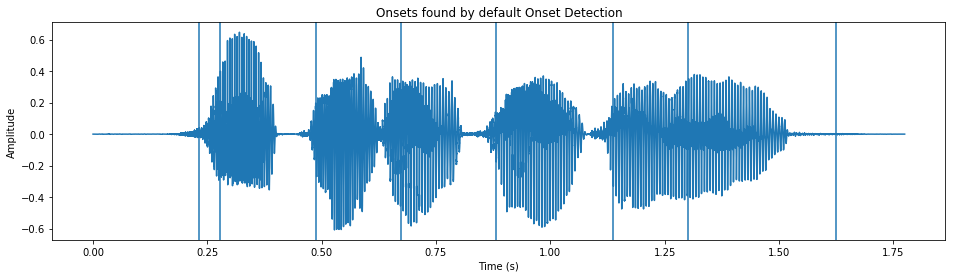

In [48]:
# Librosa's Onset Detection
onset_frames = librosa.onset.onset_detect(hbd_raw, sr=sr)
onset_times = librosa.frames_to_time(onset_frames)

length = float(hbd_raw.shape[0]) / sr
figsize=(16,4)
t = np.linspace(0,length,hbd_raw.shape[0])
plt.figure(figsize=figsize)
plt.plot(t, hbd_raw)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title("Onsets found by default Onset Detection")
for xc in onset_times:
    plt.axvline(x=xc)


Clicks for Onset Detection


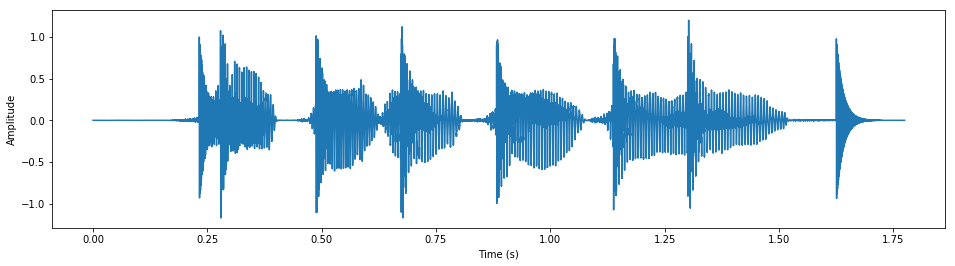

In [49]:
# Added clicks to onset detection
clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(hbd_raw))
print("Clicks for Onset Detection")
audio_utils.plot_audio(hbd_raw + clicks, sr=sr)
Audio(hbd_raw + clicks, rate=sr)


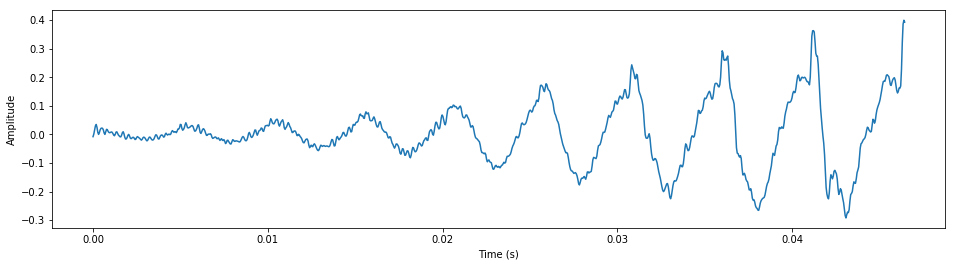

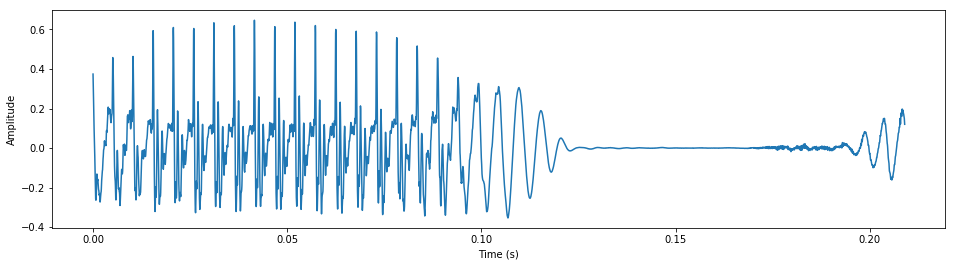

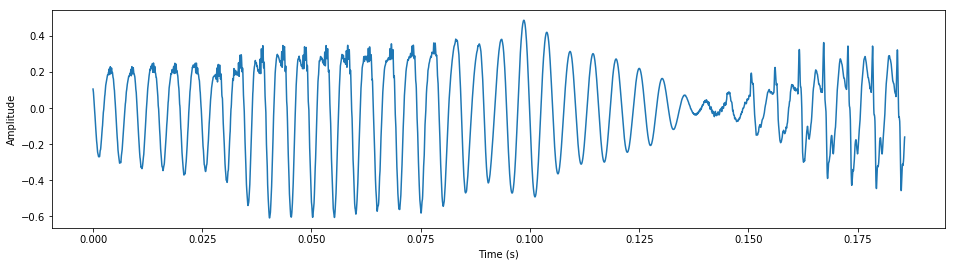

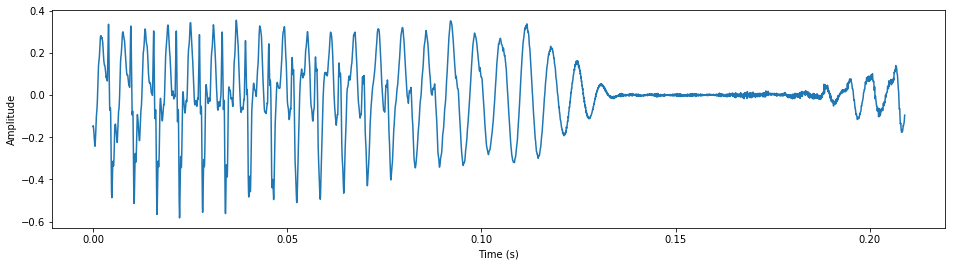

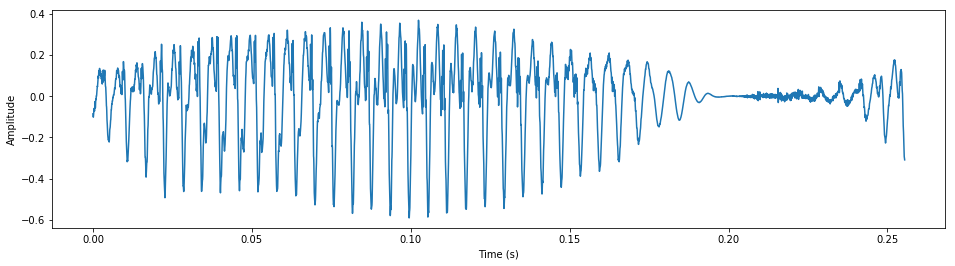

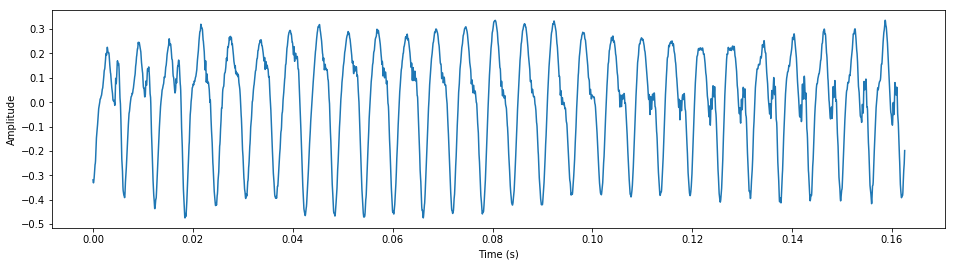

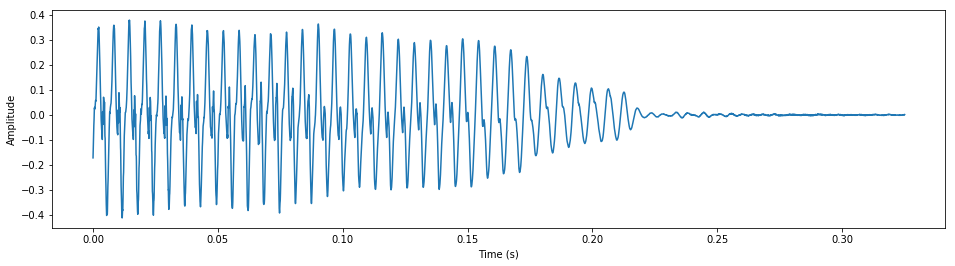

In [50]:
# Segments of Syllables found by onset detection (default settings)
onsets = librosa.frames_to_samples(onset_frames)
segment = []
for i, stop in enumerate(onsets):
    if i+1 < onsets.shape[0]:
        segment.append(hbd_raw[onsets[i]:onsets[i+1]])
        audio_utils.plot_audio(segment[i], sr=sr)
        IPython.display.display(Audio(segment[i], rate=sr))

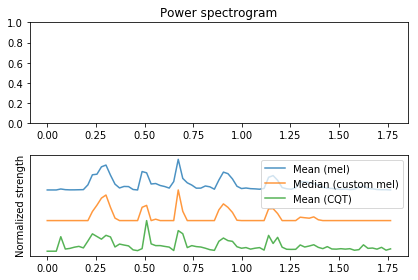

In [51]:
# Look at different methods for calculating onset strengths
D = np.abs(librosa.stft(hbd_raw))
times = librosa.frames_to_time(np.arange(D.shape[1]))
plt.figure()
ax1 = plt.subplot(2, 1, 1)
# librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')

onset_env_mel_mean = librosa.onset.onset_strength(y=hbd_raw, sr=sr)
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, 2 + onset_env_mel_mean / onset_env_mel_mean.max(), alpha=0.8, label='Mean (mel)')
onset_env_median = librosa.onset.onset_strength(y=hbd_raw, sr=sr,aggregate=np.median,fmax=8000, n_mels=256)
plt.plot(times, 1 + onset_env_median / onset_env_median.max(), alpha=0.8,label='Median (custom mel)')
onset_env_mean_cqt = librosa.onset.onset_strength(y=hbd_raw, sr=sr,feature=librosa.cqt)
plt.plot(times, onset_env_mean_cqt / onset_env_mean_cqt.max(), alpha=0.8,label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()


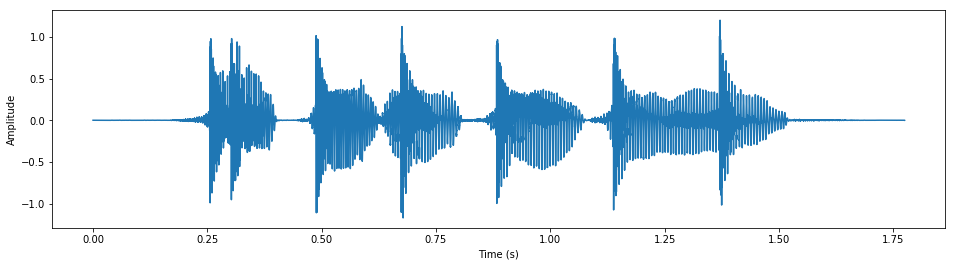

In [52]:
# Segment results from using best onset strength detection method
onset_frames = librosa.onset.onset_detect(y=hbd_raw, sr=sr, onset_envelope=onset_env_median)

clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(hbd_raw))
audio_utils.plot_audio(hbd_raw + clicks, sr=sr)
Audio(hbd_raw + clicks, rate=sr)

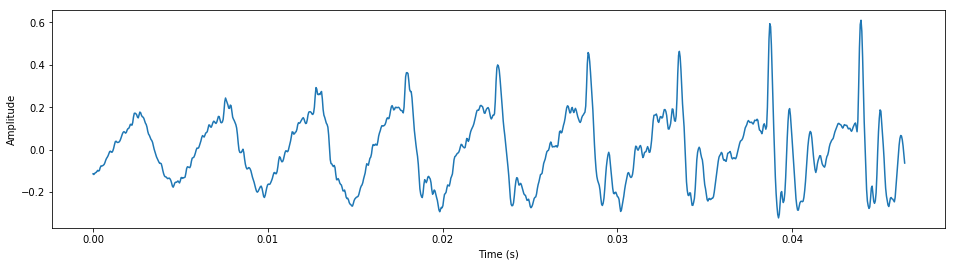

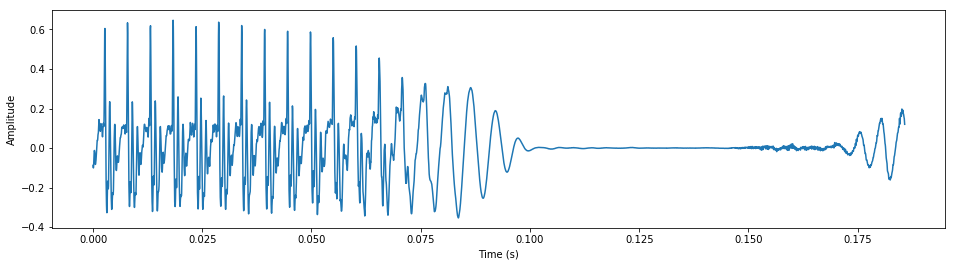

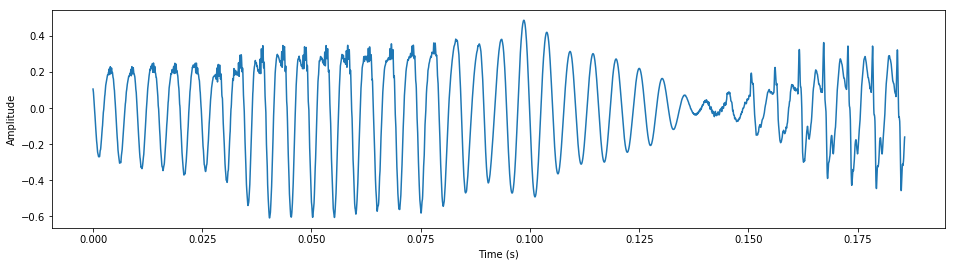

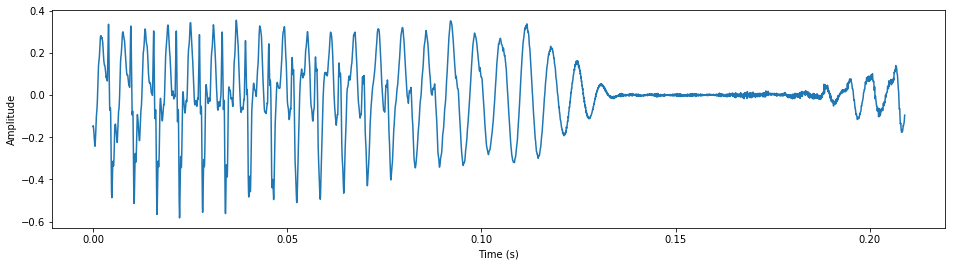

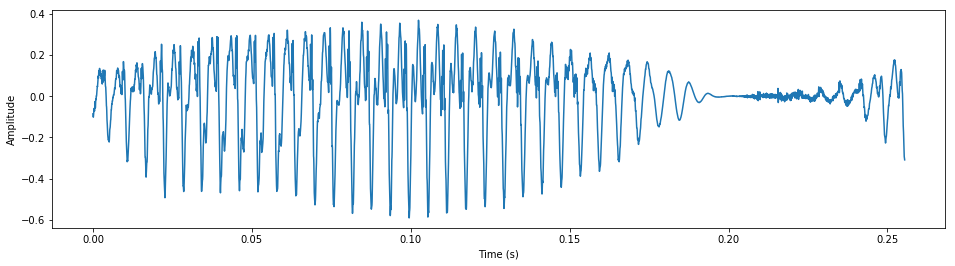

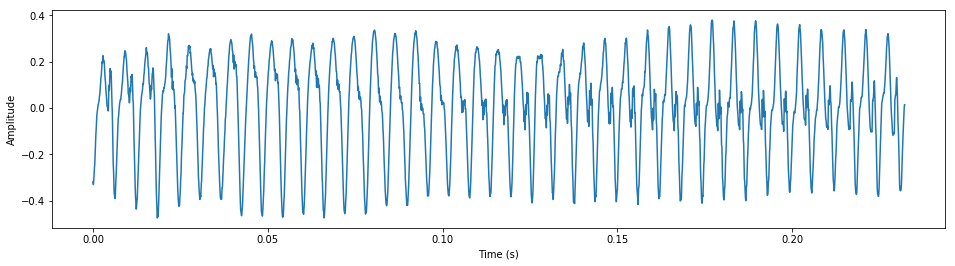

In [11]:
# Segments of Syllables found by onset detection (best settings)
onsets = librosa.frames_to_samples(onset_frames)
segment = []
for i, stop in enumerate(onsets):
    if i+1 < onsets.shape[0]:
        segment.append(hbd_raw[onsets[i]:onsets[i+1]])
        audio_utils.plot_audio(segment[i], sr=sr)
        IPython.display.display(Audio(segment[i], rate=sr))

3712


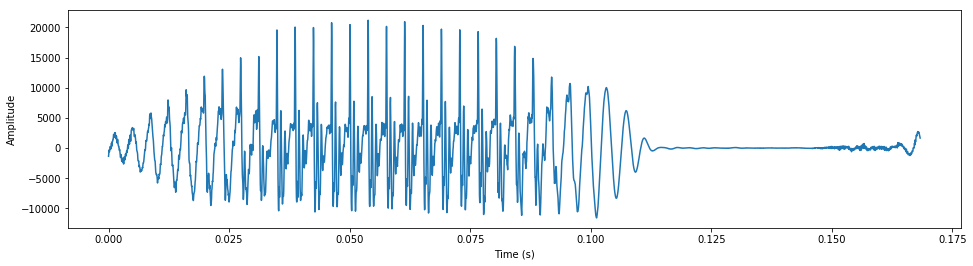

exporting chunk0.wav
4656


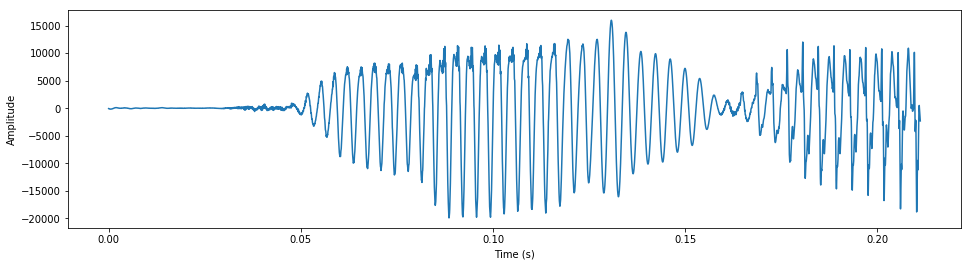

exporting chunk1.wav
5024


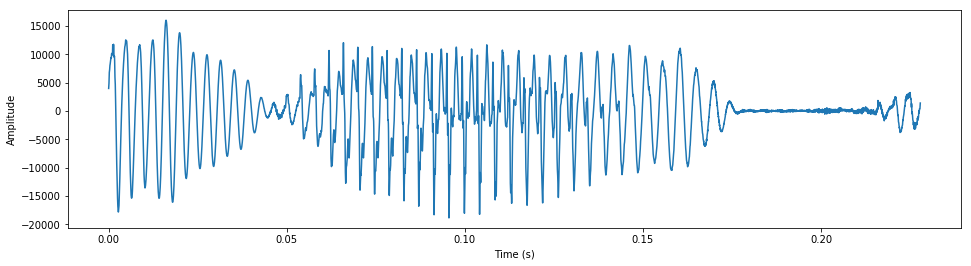

exporting chunk2.wav
4928


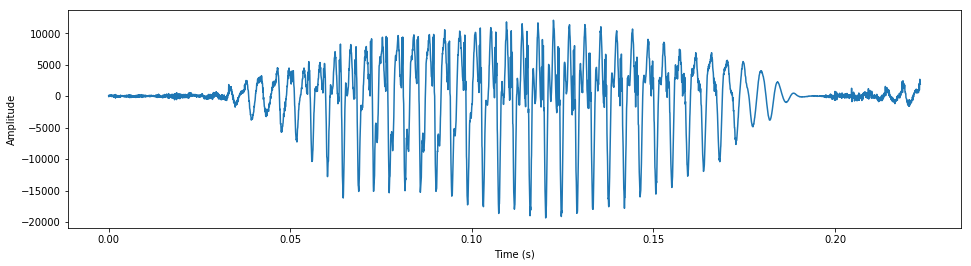

exporting chunk3.wav
6912


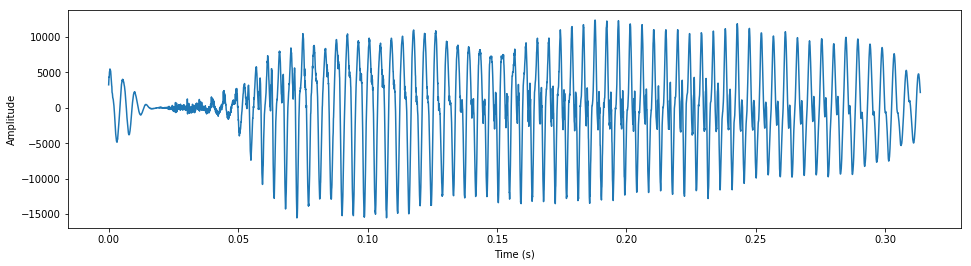

exporting chunk4.wav


In [54]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.utils import get_array_type

sound_file = AudioSegment.from_wav("speech.wav")
audio_chunks = split_on_silence(sound_file, 
    # must be silent for at least half a second
#     min_silence_len=25,
    min_silence_len=25,

    # consider it silent if quieter than -16 dBFS
#     silence_thresh=-15
    silence_thresh=-15
)
all_segments = []
for i, chunk in enumerate(audio_chunks):
    segment = chunk.get_array_of_samples()
    print(len(segment))
    segment = np.array(segment,dtype=float)
    all_segments.append(segment)
    audio_utils.plot_audio(segment, sr=sr)
    IPython.display.display(Audio(segment, rate=sr))
    out_file = "chunk{0}.wav".format(i)
    print ("exporting", out_file)
    chunk.export(out_file, format="wav")


In [43]:
# from array import array
test1 = all_segments[0]
print(test1)
# audio_segment = sound_file.get_sample_slice(start_sample=test1[0], end_sample=test1[-1])
# print(audio_segment.raw_data)
pitches, magnitudes = librosa.piptrack(y=test1, sr=sr)
print(pitches[np.nonzero(pitches)])
pitches
# print(pitches)

# sound = AudioSegment.from_wav(file="./8700hz.wav")
# sound = audio_chunks[0]
# bit_depth = sound.sample_width * 8
# array_type = get_array_type(bit_depth)
# print(array_type)

# numeric_array = array(array_type, sound._data)
# print(numeric_array)


[-1367. -1014.  -341. ...  1908.  1819.  1652.]
[ 158.8545   185.78902  195.55028  220.50198  237.04764  249.54787
  257.1585   261.4549   258.20374  253.40143  268.76413  264.8995
  282.2512   277.09518  307.2012   318.7819   332.4868   430.67477
  478.34393  519.11127  526.73224  529.6988   524.7521   538.1698
  550.3437   564.91455  640.6846   772.6992   787.36334  782.94165
  795.53613  806.3895   804.18005  890.78253 1032.7083  1043.2335
 1055.0579  1057.9653  1051.2733  1066.9596  1077.0188  1097.9751
 1315.0524  1310.4353  1325.1786  1326.5068  1320.8256  1343.6611
 1584.6328  1579.8354  1592.2507  1842.9679  1855.5277  1848.9698
 2111.848   2106.992   2369.074   2363.9976  2381.9075  2376.1155
 2639.2268  2632.97    2646.5405  2904.6018  3882.5757  3958.323  ]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

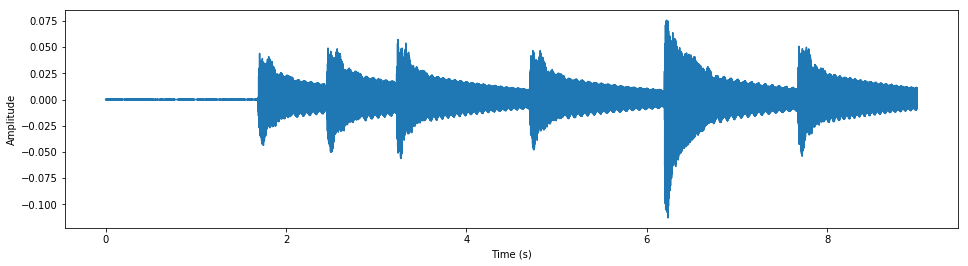

In [19]:
hbd_snip, sr = librosa.load("hbd_snip.wav")
audio_utils.plot_audio(hbd_snip, sr=sr)
IPython.display.display(Audio(hbd_snip, rate=sr))


[1.71827664 2.48453515 3.25079365 4.73687075 6.22294785 7.70902494]
[ 74 107 140 204 268 332]


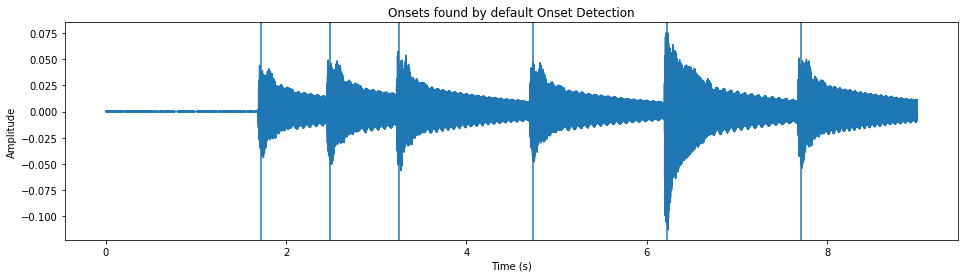

In [24]:
onset_frames = librosa.onset.onset_detect(hbd_snip, sr=sr)
onset_times = librosa.frames_to_time(onset_frames)

length = float(hbd_snip.shape[0]) / sr
figsize=(16,4)
t = np.linspace(0,length,hbd_snip.shape[0])
plt.figure(figsize=figsize)
plt.plot(t, hbd_snip)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title("Onsets found by default Onset Detection")
for xc in onset_times:
    plt.axvline(x=xc)
print(onset_times)
print(onset_frames)

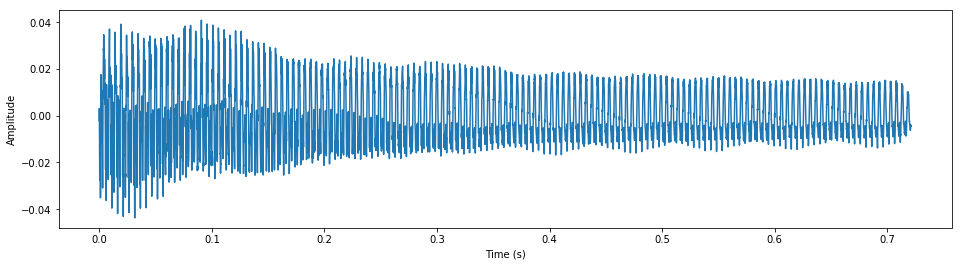

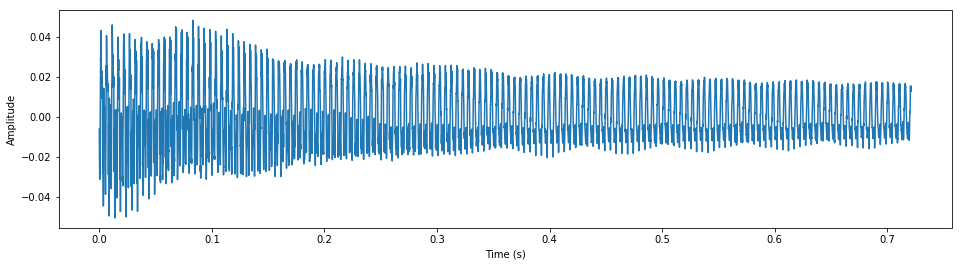

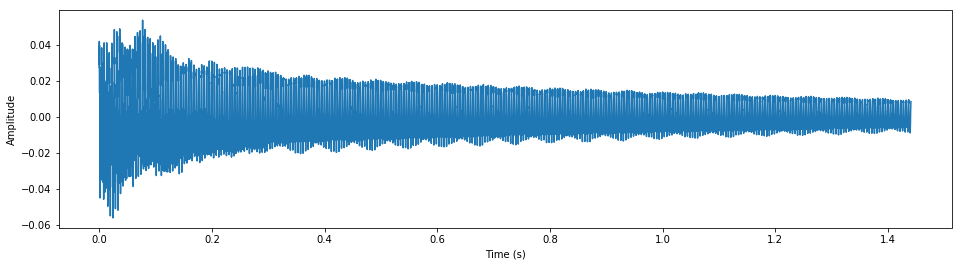

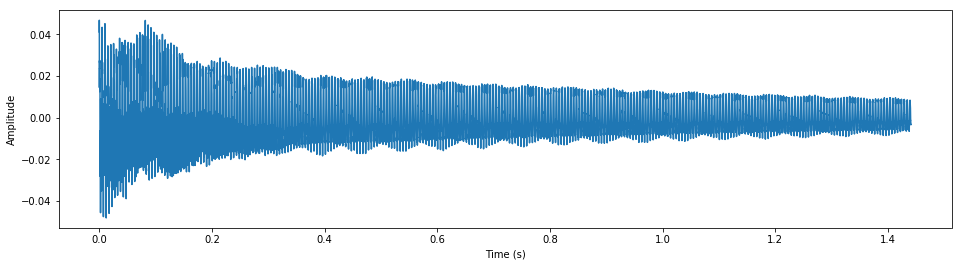

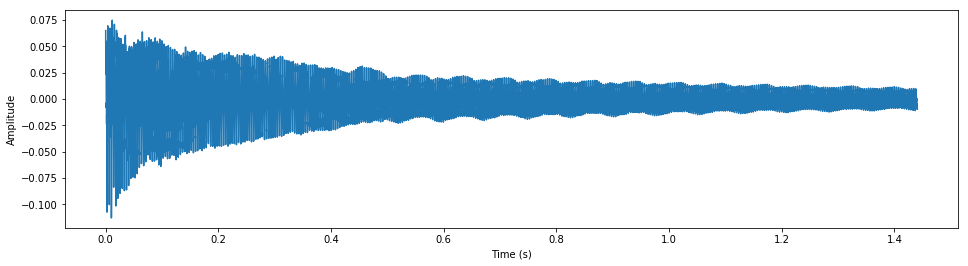

In [38]:
#196, 196, 220, 196, 260 250
onsets = librosa.frames_to_samples(onset_frames)
segment = []
for i, stop in enumerate(onsets):
    if i+1 < onsets.shape[0]:
        segment.append(hbd_snip[onsets[i]:onsets[i+1]-1000])
        audio_utils.plot_audio(segment[i], sr=sr)
        IPython.display.display(Audio(segment[i], rate=sr))

22050
1.0
1.0
5.0
3.0
Generated Happy Birthday Text


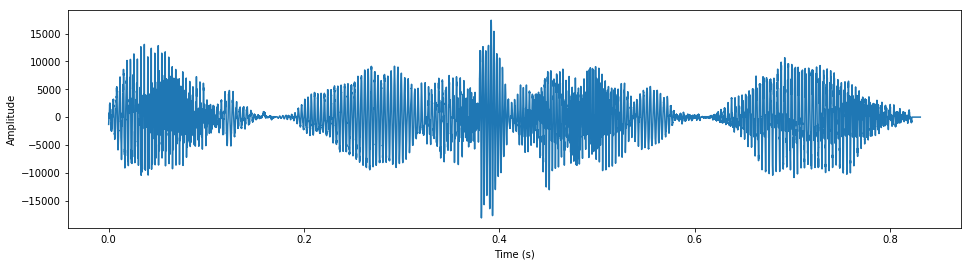

In [67]:
fn = [196, 196, 220, 196, 260]
f0 = [186.6, 190.4, 162.9, 167.7]
# sr //= 2
print(sr)

shifted_signal = []
for i in range(4):
#     audio_utils.plot_audio(all_segments[i], sr=sr)
#     IPython.display.display(Audio(all_segments[i], rate=sr))

    n_steps = np.round(np.log2(float(fn[i])/f0[i]) * 12)
    print(n_steps)

    shifted_segment = librosa.effects.pitch_shift(all_segments[i], sr, n_steps, bins_per_octave=12)
    shifted_signal.append(shifted_segment)
#     audio_utils.plot_audio(shifted_segment, sr=sr)
#     IPython.display.display(Audio(shifted_segment, rate=sr))

# Load test speech file
# hbd_raw, sr = librosa.core.load('speech.wav')
print("Generated Happy Birthday Text")
IPython.display.display(Audio(hbd_raw, rate=sr))

shifted_signal = np.concatenate(shifted_signal)
audio_utils.plot_audio(shifted_signal, sr=sr)
IPython.display.display(Audio(shifted_signal, rate=sr))